### **Loading the dataset**

Setting up the appropriate directory and loading the dataset using 02 methods -

1) From Google Drive ; or

2) From Microsoft One-Drive

***1) Importing the file from Google Drive***

In [ ]:
import gdown
import os

# Defining the Google Drive URL
url = 'https://drive.google.com/uc?id=1b8_NrY3sRB79CHOF3h8tuDWScv9YpbwE'


# Defining the output file name
output_file = 'tel_g.xlsx'

try:
    # Downloading the file
    gdown.download(url, output_file, quiet=False)
except Exception as e:
    print("\nFile download unsuccessful:", str(e))


# Check if the file exists
if os.path.exists(output_file):
    # Checking the file size in bytes
    file_size = os.path.getsize(output_file)

    # Defining a minimum acceptable file size of 100kB
    min_file_size = 100000

    if file_size > min_file_size:
        print("\n\nFile downloaded successfully.")
    else:
        print(f"File size is too small ({file_size} bytes). Download may have been unsuccessful.")
else:
    print("File does not exist. Download may have been unsuccessful.")

Downloading...
From: https://drive.google.com/uc?id=1b8_NrY3sRB79CHOF3h8tuDWScv9YpbwE
To: /content/tel_g.xlsx
100%|██████████| 131k/131k [00:00<00:00, 47.4MB/s]



File downloaded successfully.


***2) Importing the file from One Drive***

In [ ]:
import requests
import pandas as pd


link = "https://powergrid1989-my.sharepoint.com/:x:/g/personal/60003871_powergrid_in/EQSwPHuP7olNrXCNAXhc5PkBzp-S5JJFFSL7ENDm7WQljg?e=lRuvBT&download=1"


output_file_o = "tel_o.xlsx"

# Send an HTTP GET request to the OneDrive link to download the file
response = requests.get(link)

# Save the file content to a temporary file in runtime
if response.status_code == 200:
    # Save the content to a local CSV file
    with open(output_file_o, "wb") as f:
        f.write(response.content)
else:
    print('Failed to download the file. Status code:', response.status_code)


# Checking if the file exists
if os.path.exists(output_file_o):
    # Checking the file size in bytes
    file_size = os.path.getsize(output_file_o)

    # Defining a minimum acceptable file size of 100kB
    min_file_size = 100000  # For example, 100 kB

    if file_size > min_file_size:
        print("\nFile downloaded successfully.")
    else:
        print(f"File size is too small ({file_size} bytes). Download may have been unsuccessful.")
else:
    print("File does not exist. Download may have been unsuccessful.")



File downloaded successfully.


### **Reading the CSV File in Pandas DF**

In [ ]:
from IPython.display import display

file_options = ["tel_o.xlsx", "tel_g.xlsx"]
tel_df = None

for file in file_options:
    try:
        tel_df = pd.read_excel(file, na_values=[''])
        break  # Stop when the first file is successfully read
    except FileNotFoundError:
        continue  # If the file is not found, try the next one

if tel_df is not None:
    # Data was successfully read from one of the files
    print(" File Loaded Succesfully in tel_df : ")
    display(tel_df.head())

else:
    # Both files were not found
    print("No data found in either file.")

 File Loaded Succesfully in tel_df : 


,Month_Year,LSA,Service_Provider,Technology,Median_Speed,Median_Signal_Strength
0,2018-03-01,Andhra Pradesh,AIRTEL,3G,1.105,-85.0
1,2018-03-01,Andhra Pradesh,IDEA,3G,1.880,-81.0
2,2018-03-01,Andhra Pradesh,AIRTEL,4G,5.190,-97.0
3,2018-03-01,Andhra Pradesh,IDEA,4G,2.120,-91.0
4,2018-03-01,Andhra Pradesh,JIO,4G,6.940,-91.0


### **Verifing loaded data in dataframe**

---


 Getting the number of rows and columns

In [ ]:
num_rows, num_columns = tel_df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 3371
Number of columns: 6


In [ ]:
tel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3371 entries, 0 to 3370
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Month_Year              3371 non-null   object 
 1   LSA                     3371 non-null   object 
 2   Service_Provider        3371 non-null   object 
 3   Technology              3371 non-null   object 
 4   Median_Speed            3371 non-null   float64
 5   Median_Signal_Strength  3371 non-null   float64
dtypes: float64(2), object(4)
memory usage: 158.1+ KB


In [ ]:
# Checking percentage of missing values in each column
missing_percentage = (tel_df.isnull().mean() * 100).round(2)

# Checking for duplicate rows
duplicate_rows = tel_df.duplicated().sum()

# Calculating the percentage of duplicate rows
duplicate_percentage = (duplicate_rows / len(tel_df) * 100).round(2)

print("Percentage of Missing Values in Each Column of Telecom Data:")
print(missing_percentage)

print("\nPercentage of Duplicate Rows in the DataFrame:", duplicate_percentage)


Percentage of Missing Values in Each Column of Telecom Data:
Month_Year                0.0
LSA                       0.0
Service_Provider          0.0
Technology                0.0
Median_Speed              0.0
Median_Signal_Strength    0.0
dtype: float64

Percentage of Duplicate Rows in the DataFrame: 0.0


### 🚩 ***----> It seems that the data contains no missing values and no duplicate rows in all the columns***

In [ ]:
# Checking the Dataframe
tel_df['Month_Year'] = pd.to_datetime(tel_df['Month_Year']).dt.strftime('%b-%y')
tel_df.head(10)

,Month_Year,LSA,Service_Provider,Technology,Median_Speed,Median_Signal_Strength
0,Mar-18,Andhra Pradesh,AIRTEL,3G,1.105,-85.0
1,Mar-18,Andhra Pradesh,IDEA,3G,1.880,-81.0
2,Mar-18,Andhra Pradesh,AIRTEL,4G,5.190,-97.0
3,Mar-18,Andhra Pradesh,IDEA,4G,2.120,-91.0
4,Mar-18,Andhra Pradesh,JIO,4G,6.940,-91.0
5,Mar-18,Assam,AIRTEL,3G,1.555,-85.0
6,Mar-18,Assam,VODAFONE,3G,0.340,-85.0
7,Mar-18,Assam,AIRTEL,4G,5.715,-97.0
8,Mar-18,Assam,IDEA,4G,4.000,-99.0
9,Mar-18,Assam,JIO,4G,5.470,-89.0


# **1) Summary statistics of Data Speed and Signal Strength in my LSA : Haryana**

In [ ]:
# Defining my LSA name in a new variable
my_lsa_name = 'Haryana'

# Filtering the DataFrame for records within the specified LSA : Haryana
my_lsa_df = tel_df[tel_df['LSA'] == my_lsa_name]

# Calculating summary statistics for data speed and signal strength
data_speed_stats = my_lsa_df['Median_Speed'].describe()
signal_strength_stats = my_lsa_df['Median_Signal_Strength'].describe()

# Printing the summary statistics
print(f"Summary Statistics for Data Speed in {my_lsa_name} : ")
print(data_speed_stats)

print(f"\nSummary Statistics for Signal Strength in {my_lsa_name} :")
print(signal_strength_stats)


Summary Statistics for Data Speed in Haryana : 
count    172.000000
mean       3.664157
std        3.873041
min        0.266000
25%        1.416125
50%        2.734250
75%        4.645625
max       32.490000
Name: Median_Speed, dtype: float64

Summary Statistics for Signal Strength in Haryana :
count    172.000000
mean     -89.633721
std        7.521868
min     -102.000000
25%      -95.000000
50%      -92.000000
75%      -85.000000
max      -57.000000
Name: Median_Signal_Strength, dtype: float64


## **1.1) Box-plot of Signal Strength and Speed in my LSA : Haryana**

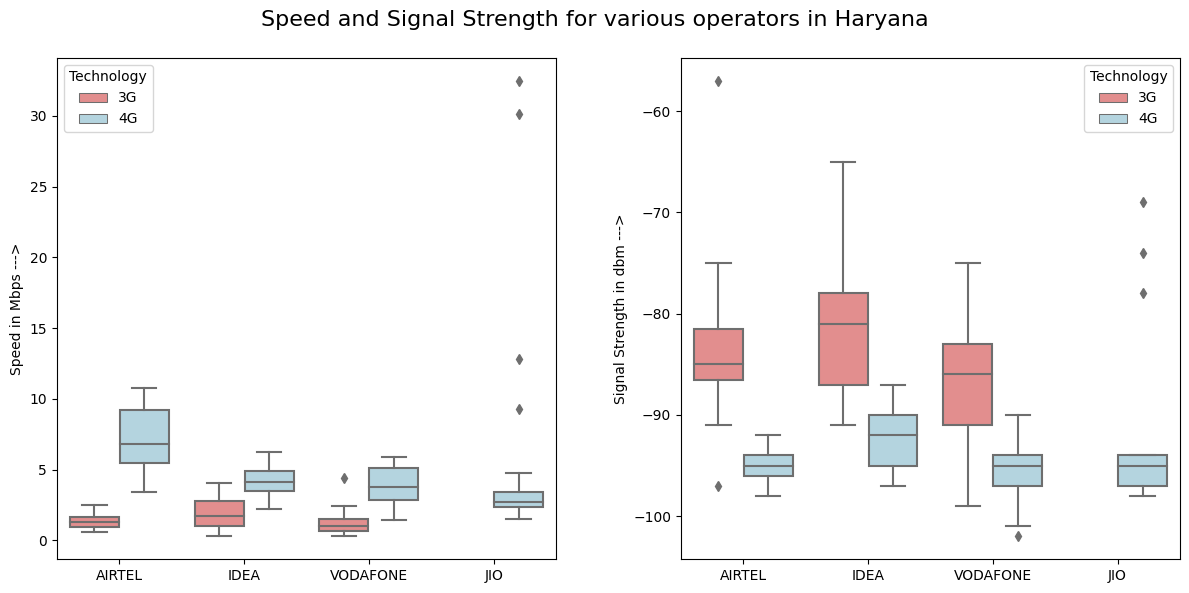

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Defining a custom color palette as a dictionary with 'Technology' values as keys and colors as values
custom_palette = {
    '3G': 'lightcoral',  # Light magenta
    '4G': 'lightblue',   # Light blue
}

# Create a single figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Title for the entire set of subplots
fig.suptitle('Speed and Signal Strength for various operators in Haryana', fontsize=16)

# Create the first subplot for Median_Speed
sns.boxplot(data = my_lsa_df, x = 'Service_Provider', y = 'Median_Speed', ax = axes[0], hue = 'Technology', palette = custom_palette)
axes[0].set_ylabel('Speed in Mbps --->')
axes[0].set_xlabel('')

# Create the second subplot for Median_Signal_Strength
sns.boxplot(data = my_lsa_df, x = 'Service_Provider', y = 'Median_Signal_Strength', ax = axes[1], hue = 'Technology', palette = custom_palette)
axes[1].set_ylabel('Signal Strength in dbm --->')
axes[1].set_xlabel('')

# Adjust the layout
plt.tight_layout()
plt.subplots_adjust(top=0.9,wspace=0.25)  # Add top space for the common title and some extra space b/w subplots
plt.show()



# **2) 4G Data Speed Comparision in Haryana and Karnataka**


---

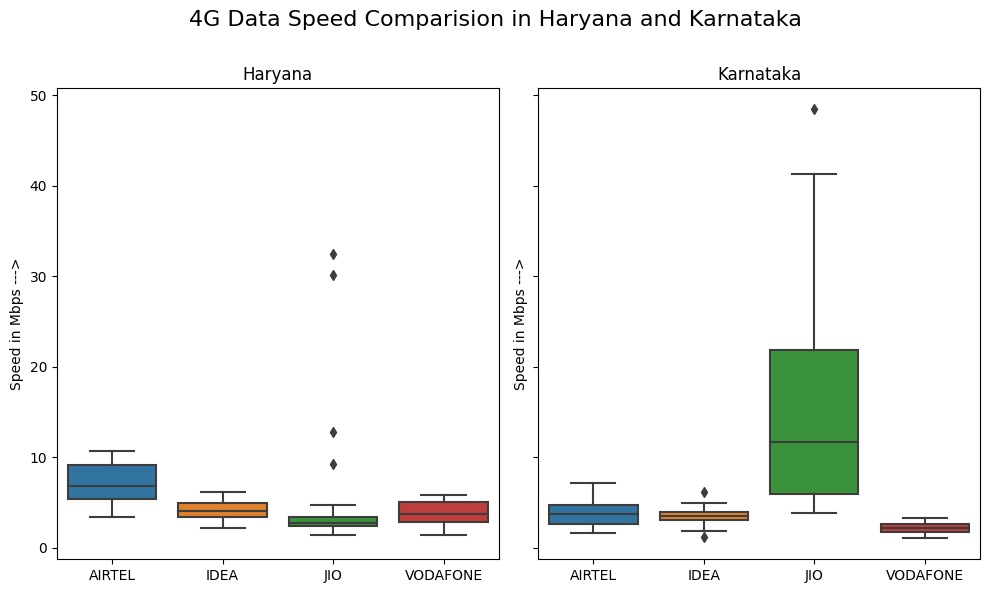

In [ ]:
# Extracting Data for Karnataka LSA
ktk_lsa_df = tel_df[tel_df['LSA']=='Karnataka']
ktk_lsa_df.head()

# Creating a single figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 6), sharey=True)

# Title
fig.suptitle('4G Data Speed Comparision in Haryana and Karnataka', fontsize=16)

# Creating the first subplot for Median_Speed in Haryana
sns.boxplot(data = my_lsa_df[my_lsa_df['Technology'] == '4G'], x = 'Service_Provider', y = 'Median_Speed', ax = axes[0])
axes[0].set_ylabel('Speed in Mbps --->')
axes[0].set_xlabel('')
axes[0].set_title('Haryana')  # Adding a title to the subplot

# Creating the second subplot for Median_Speed in Karnataka
sns.boxplot(data = ktk_lsa_df[ktk_lsa_df['Technology'] == '4G'], x = 'Service_Provider', y = 'Median_Speed', ax = axes[1])
axes[1].set_ylabel('Speed in Mbps --->')
axes[1].set_xlabel('')
axes[1].set_title('Karnataka')  # Adding a title to the subplot

# Adjusting the layout
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Adding space for the common title
plt.show()

##🚩 **`Comparision b/w 4G Data Speeds in Haryana & Karnataka :`**
From the above box plot we can deduce that for the time period under consideration i.e. from March-2018 to March-2020, other operators except JIO were performing well in Haryana in terms of providing good 4G network speeds. However, JIO is offering very good 4G Data Speeds in Karnataka.

It is also evident that in Karnataka the variance of 4G data speeds of other operators is less and values are less distributed than for JIO which are positive skewed and more distributed. It means JIO is offering wide range of 4G Data Speeds in Karnataka that may be due to lesser presence of JIO in Class B & C type cities since its launch in 2016. However, within 02-03 years after launch, JIO may be investing a good chunk in class A type cities which probably contributed to 4G Data Speeds upto 40-50 Mbps also.

# **3) State the hypothesis, perform the required test, and prove whether the average 4G data speed in your LSA significantly different from that experienced in Karnataka LSA?**


**Null Hypothesis (H0):** The average 4G data speed in Haryana LSA is equal to the average 4G data speed in Karnataka LSA.

**Alternative Hypothesis (H1):** The average 4G data speed in Haryana LSA is not equal to the average 4G data speed in Karnataka LSA.

---



In [40]:
import scipy.stats as stats
import numpy as np

# Extracting the 4G data speeds for Haryana and Karnataka LSA
my_lsa_speeds = my_lsa_df[my_lsa_df['Technology'] == '4G']['Median_Speed']
karnataka_lsa_speeds = ktk_lsa_df[ktk_lsa_df['Technology'] == '4G']['Median_Speed']

# Performing a two-sample t-test (Welch's Test) considering unequal variances,
# since these are two independent data sets of Haryana & Karnataka and population standard deviation is also unknown.
t_statistic, p_value = stats.ttest_ind(my_lsa_speeds, karnataka_lsa_speeds, equal_var = False)

# Getting the significance level (alpha)
alpha_input = input(f"Please enter Significance Level for Hypothesis Test (in %) [Default 5%] : ")


# If alpha not entered by user, we can take default significance level of 5 % or accuracy of 95 %
if alpha_input:
    alpha = float(alpha_input) / 100
else:
    print("No user input, hence considering default Significance level of 5 % for Hypothesis Testing")
    alpha = 0.05  # Default alpha of 0.05 (5%)


print(f"\nConclusion for Hypothesis Test for significance level of {alpha*100} % using t-test is as below :- \n")

# Checking the p-value against alpha to determine significance
if p_value <= alpha:
    print(f"Since, the Calculated Probability of Null Hypothesis using 't-test' is : {round(p_value*100,2)} %, which is less than the specified Significance Level of {alpha*100} % ")
    print("\nHence, we Reject the null hypothesis. i.e. There is a significant difference in average 4G data speeds in Haryana & Karnataka LSA.")
else:
    print(f"Since, the Calculated Probability of Null Hypothesis using 't-test' is : {round(p_value*100,2)} %, which is more than the specified Significance Level of {alpha*100} % ")
    print("\nHence, we Fail to reject the null hypothesis. i.e. There is no significant difference in average 4G data speeds in Haryana & Karnataka LSA.")

# Print the t-statistic and p-value
print("\nTest Statistics are as below :")
print(f"t-statistic: {t_statistic}")
print(f"P-value: {p_value}")


Please enter Significance Level for Hypothesis Test (in %) [Default 5%] : 50

Conclusion for Hypothesis Test for significance level of 50.0 % using t-test is as below :- 

Since, the Calculated Probability of Null Hypothesis using 't-test' is : 24.39 %, which is less than the specified Significance Level of 50.0 % 

Hence, we Reject the null hypothesis. i.e. There is a significant difference in average 4G data speeds in Haryana & Karnataka LSA.

Test Statistics are as below :
t-statistic: -1.170000387624187
P-value: 0.243867679084539


# **4) State the hypothesis, perform the required test, and prove whether the speeds of 4G networks of different operators across India are the same or different.**

**Null Hypothesis (H0):** The speeds of 4G networks of different operators across India are the same (no significant difference among means).

**Alternative Hypothesis (H1):** The speeds of 4G networks of different operators across India are different (there is a significant difference among means).

---



In [ ]:
# Extracting 4G speed data for different Service_Providers in a separate dictionary
operators = tel_df['Service_Provider'].unique()
speed = {}  # Initialize an empty dictionary

for operator in operators:
    speed[operator] = tel_df[(tel_df['Service_Provider'] == operator) & (tel_df['Technology'] == '4G')]['Median_Speed']

# Extract data from the dictionary and create separate lists for each group
speed_data_by_operators = [data for data in speed.values()]

# Since there are more than 02 samples, we can perform one-way ANOVA test as well as Kruskal-Wallis test
# ANOVA assumes normality and homogeneity of variances, while the Kruskal-Wallis test is non-parametric and makes fewer assumptions about the data distribution
# Hence, using Kruskal-Wallis test

f_statistic, p_value = stats.kruskal(*speed_data_by_operators)

# For ANOVA, we can use below method :
# f_statistic, p_value = stats.f_oneway(*speed_data_by_operators)

# Getting the significance level (alpha)
alpha_input = input("Please enter Significance Level for Hypothesis Test (in %) [Default 5%] : ")


# If alpha not entered by user, we can take default significance level of 5 % or accuracy of 95 %
if alpha_input:
    alpha = float(alpha_input) / 100
else:
    print("No user input, hence considering default Significance level of 5 % for Hypothesis Testing")
    alpha = 0.05  # Default alpha of 0.05 (5%)


print(f"\nConclusion for Hypothesis Test for significance level of {alpha*100} % using 'Kruskal-Wallis' test is as below :- \n")


# Checking the p-value against alpha to determine significance
if p_value <= alpha:
    print(f"Since, the Calculated Probability of Null Hypothesis using 'Kruskal-Wallis' test is : {round(p_value*100,2)} %, which is less than the specified Significance Level of {alpha*100} % ")
    print("\nHence, we Reject the null hypothesis. i.e. There are significant differences among the 4G N/w Speeds of different operators across India.")
else:
    print(f"Since, the Calculated Probability of Null Hypothesis using 'Kruskal-Wallis' test is : {round(p_value*100,2)} %, which is more than the specified Significance Level of {alpha*100} % ")
    print("\nHence, we Fail to reject the null hypothesis. There are no significant differences among the 4G N/w Speeds of different operators across India.")


# Print the F-statistic and p-value
print("\nTest Statistics are as below :")
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")


Please enter Significance Level for Hypothesis Test (in %) [Default 5%] : 
No user input, hence considering default Significance level of 5 % for Hypothesis Testing

Conclusion for Hypothesis Test for significance level of 5.0 % using 'Kruskal-Wallis' test is as below :- 

Since, the Calculated Probability of Null Hypothesis using 'Kruskal-Wallis' test is : 0.0 %, which is less than the specified Significance Level of 5.0 % 

Hence, we Reject the null hypothesis. i.e. There are significant differences among the 4G N/w Speeds of different operators across India.

Test Statistics are as below :
F-statistic: 280.4199792353764
P-value: 1.7177512277196254e-60


# **5) State the hypothesis, perform the required test, and prove whether the average data speed of 3G networks in the country is the same or different from that of 4G networks.**

**Null Hypothesis (H0):** The average data speed of 3G networks is the same as the average data speed of 4G networks in the country.

**Alternative Hypothesis (H1):** The average data speed of 3G networks is different from the average data speed of 4G networks in the country.

---



In [ ]:
# Extracting 3G/4G speed data in a separate dictionary
nw_list = tel_df['Technology'].unique()
speed = {}  # Initialize an empty dictionary

for tech in nw_list:
    speed[tech] = tel_df[tel_df['Technology'] == tech]['Median_Speed']

# Extract data from the dictionary and create separate lists for each group
speed_data_by_tech = [data for data in speed.values()]


# Performing a two-sample t-test (Welch's Test) considering unequal variances
t_statistic_statistic, p_value = stats.ttest_ind(*speed_data_by_tech, equal_var=False)

# Getting the significance level (alpha)
alpha_input = input("Please enter Significance Level for Hypothesis Test (in %) [Default 5%] : ")


# If alpha not entered by user, we can take default significance level of 5 % or accuracy of 95 %
if alpha_input:
    alpha = float(alpha_input) / 100
else:
    print("No user input, hence considering default Significance level of 5 % for Hypothesis Testing")
    alpha = 0.05  # Default alpha of 0.05 (5%)


print(f"\nConclusion for Hypothesis Test for significance level of {alpha*100} % using t-test is as below :- \n")


# Checking the p-value against alpha to determine significance
if p_value <= alpha:
    print(f"Since, the Calculated Probability of Null Hypothesis using 't-test' is : {round(p_value*100,2)} %, which is less than the specified Significance Level of {alpha*100} % ")
    print("\nHence, we Reject the null hypothesis. i.e. The average data speed of 3G networks is different from that of 4G networks in India.")
else:
    print(f"Since, the Calculated Probability of Null Hypothesis using 't-test' is : {round(p_value*100,2)} %, which is more than the specified Significance Level of {alpha*100} % ")
    print("\nHence, we Fail to reject the null hypothesis. i.e. The average data speed of 3G networks is the same as that of 4G networks in India.")


# Print the t-statistic and p-value
print("\nTest Statistics are as below :")
print(f"t-statistic: {t_statistic}")
print(f"P-value: {p_value}")


Please enter Significance Level for Hypothesis Test (in %) [Default 5%] : 
No user input, hence considering default Significance level of 5 % for Hypothesis Testing

Conclusion for Hypothesis Test for significance level of 5.0 % using t-test is as below :- 

Since, the Calculated Probability of Null Hypothesis using 't-test' is : 0.0 %, which is less than the specified Significance Level of 5.0 % 

Hence, we Reject the null hypothesis. i.e. The average data speed of 3G networks is different from that of 4G networks in India.

Test Statistics are as below :
t-statistic: -1.170000387624187
P-value: 5.454221160852939e-178


# **6) State the hypothesis; perform the required test, and prove whether the average signal strength of 3G networks in the country is the same or different across LSAs.**

**Null Hypothesis (H0):** The average signal strength of 3G networks is the same across all LSAs in the country.

**Alternative Hypothesis (H1):** The average signal strength of 3G networks is different across at least one LSA in the country.

---



In [ ]:
# Extracting 3G signal strength for different Service_Providers in a separate dictionary
lsa_list = tel_df['LSA'].unique()
signal = {}  # Initialize an empty dictionary

for lsa in lsa_list:
    signal[lsa] = tel_df[(tel_df['LSA'] == lsa) & (tel_df['Technology'] == '3G')]['Median_Signal_Strength']


# Extract data from the dictionary and create separate lists for each group
signal_data_by_lsa = [data for data in signal.values()]


# Since there are more than 02 samples, we can perform one-way ANOVA test as well as Kruskal-Wallis test
# ANOVA assumes normality and homogeneity of variances, while the Kruskal-Wallis test is non-parametric and makes fewer assumptions about the data distribution
# Hence, using Kruskal-Wallis test

f_statistic, p_value = stats.kruskal(*signal_data_by_lsa)

# Getting the significance level (alpha)
alpha_input = input("Please enter Significance Level for Hypothesis Test (in %) [Default 5%] : ")


# If alpha not entered by user, we can take default significance level of 5 % or accuracy of 95 %
if alpha_input:
    alpha = float(alpha_input) / 100
else:
    print("No user input, hence considering default Significance level of 5 % for Hypothesis Testing")
    alpha = 0.05  # Default alpha of 0.05 (5%)


print(f"\nConclusion for Hypothesis Test for significance level of {alpha*100} % using 'Kruskal-Wellis' is as below :- \n")



# Checking the p-value against alpha to determine significance
if p_value <= alpha:
    print(f"Since, the Calculated Probability of Null Hypothesis using 't-test' is : {round(p_value*100,2)} %, which is less than the specified Significance Level of {alpha*100} % ")
    print("\nHence, we Reject the null hypothesis. i.e. There are significant differences among the Average Signal Strengths of 3G networks of different LSA across India.")
else:
    print(f"Since, the Calculated Probability of Null Hypothesis using 't-test' is : {round(p_value*100,2)} %, which is more than the specified Significance Level of {alpha*100} % ")
    print("\nHence, we Fail to reject the null hypothesis. There are no significant differences among the Average Signal Strengths of 3G networks of different LSA across India.")


# Print the F-statistic and p-value
print("\nTest Statistics are as below :")
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")


Please enter Significance Level for Hypothesis Test (in %) [Default 5%] : 
No user input, hence considering default Significance level of 5 % for Hypothesis Testing

Conclusion for Hypothesis Test for significance level of 5.0 % using 'Kruskal-Wellis' is as below :- 

Since, the Calculated Probability of Null Hypothesis using 't-test' is : 0.0 %, which is less than the specified Significance Level of 5.0 % 

Hence, we Reject the null hypothesis. i.e. There are significant differences among the Average Signal Strengths of 3G networks of different LSA across India.

Test Statistics are as below :
F-statistic: 236.59436187902278
P-value: 1.9912341388360265e-38


# **7) State the hypothesis, perform the required test, and prove whether the average speed of 4G networks in the country is the same or different across LSAs and operators.**

**Null Hypothesis (H0):** The average speed of 4G networks is the same across LSAs and operators.

**Alternative Hypothesis (H1):** The average speed of 4G networks is different across LSAs and operators.

---



In [ ]:
import pandas as pd
import scipy.stats as stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# For the subject hypothesis testing, there are two categorical variables
# Hence, we need to perform two-way ANOVA test


# Fitting a two-way ANOVA model
formula = 'Median_Speed ~ C(LSA) * C(Service_Provider)'
model = ols(formula, data=tel_df[tel_df['Technology'] == '4G']).fit()
anova_table = anova_lm(model, typ=2)

# Getting the significance level (alpha)
alpha_input = input("Please enter Significance Level for Hypothesis Test (in %) [Default 5%] : ")

# If alpha not entered by user, we can take default significance level of 5 % or accuracy of 95 %
if alpha_input:
    alpha = float(alpha_input) / 100
else:
    print("No user input, hence considering default Significance level of 5 % for Hypothesis Testing")
    alpha = 0.05  # Default alpha of 0.05 (5%)


print(f"\nConclusion for Hypothesis Test for significance level of {alpha*100} % using 'two-way ANOVA Test' is as below :- \n")

# Extract p-values for LSAs, operators, and their common interaction
p_lsa = anova_table['PR(>F)']['C(LSA)']
p_operator = anova_table['PR(>F)']['C(Service_Provider)']
p_interaction = anova_table['PR(>F)']['C(LSA):C(Service_Provider)']


# Checking the p-value against alpha to determine significance
if p_lsa <= alpha or p_operator <= alpha or p_interaction <= alpha:
    print(f"Since, the Calculated Probability of Null Hypothesis using 't-test' is : {round(p_value*100,2)} %, which is less than the specified Significance Level of {alpha*100} % ")
    print("\nHence, we Reject the null hypothesis, i.e. There are significant differences in 4G network speeds across LSAs, operators, or their interaction.\n\n")
else:
    print(f"Since, the Calculated Probability of Null Hypothesis using 't-test' is : {round(p_value*100,2)} %, which is more than the specified Significance Level of {alpha*100} % ")
    print("\nHence, we Fail to reject the null hypothesis, i.e. The average 4G network speed is similar across LSAs, operators, or their interaction.\n\n")


# Print the ANOVA table
print("\nTest Statistics are as below :")
print(f'\nANOVA Table :\n {anova_table}')


Please enter Significance Level for Hypothesis Test (in %) [Default 5%] : 
No user input, hence considering default Significance level of 5 % for Hypothesis Testing

Conclusion for Hypothesis Test for significance level of 5.0 % using 'two-way ANOVA Test' is as below :- 

Since, the Calculated Probability of Null Hypothesis using 't-test' is : 0.0 %, which is less than the specified Significance Level of 5.0 % 

Hence, we Reject the null hypothesis, i.e. There are significant differences in 4G network speeds across LSAs, operators, or their interaction.



Test Statistics are as below :

ANOVA Table :
                                   sum_sq      df           F         PR(>F)
C(LSA)                       5258.631749    21.0    8.696984   2.333655e-26
C(Service_Provider)         15832.541698     3.0  183.292453  1.259245e-104
C(LSA):C(Service_Provider)  15759.835877    63.0    8.688131   2.800617e-67
Residual                    55829.355047  1939.0         NaN            NaN


# **--> Observation summary and validation**

**Various observations of the case study are as follows :**

1. There is no significant difference in average 4G data speeds in Haryana & Karnataka LSA.
2. There are significant differences among the 4G N/w Speeds of different operators across India.
3. The average data speed of 3G networks is different from that of 4G networks in India.
4. There are significant differences among the Average Signal Strengths of 3G networks of different LSA across India.
5. There are significant differences in 4G network speeds across LSAs & operators.

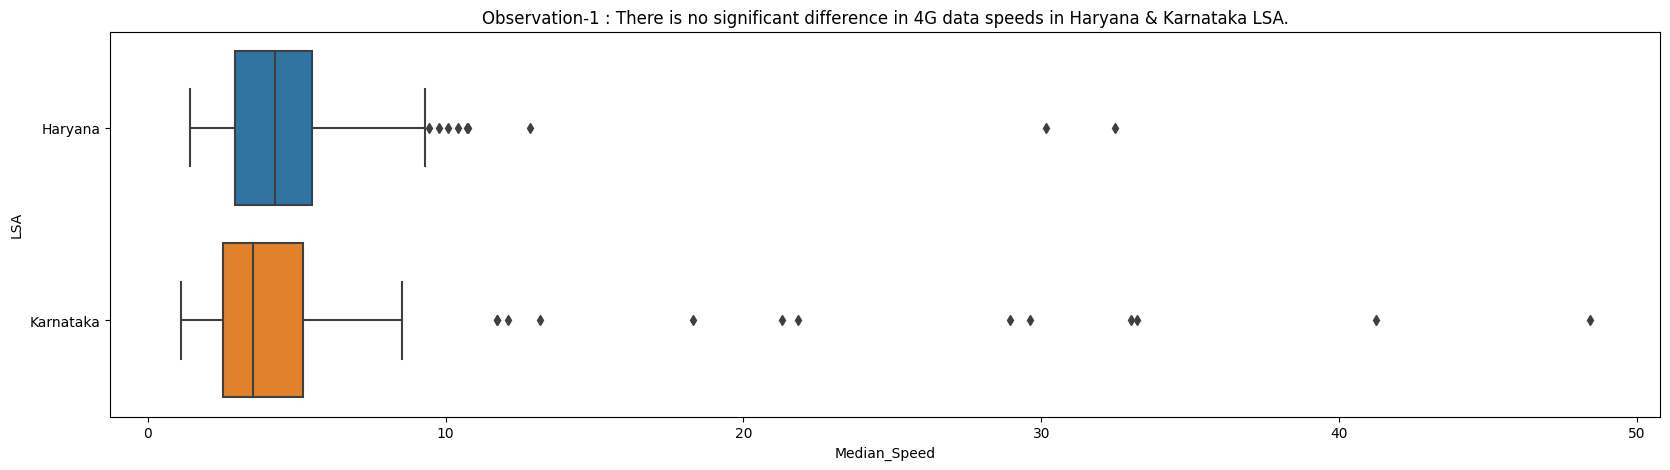

In [ ]:
# Plot for Observation-1 : There is no significant difference in 4G data speeds in Haryana & Karnataka LSA.

# Filtering the DataFrame to include data for 'Haryana' and 'Karnataka' LSAs
filtered_data = tel_df[(tel_df['Technology'] == '4G') & ((tel_df['LSA'] == 'Haryana') | (tel_df['LSA'] == 'Karnataka'))]

plt.figure(figsize=(20, 5))
plt.title('Observation-1 : There is no significant difference in 4G data speeds in Haryana & Karnataka LSA.')
sns.boxplot(data=filtered_data, y ='LSA', x = 'Median_Speed', orient = 'horizontal')
#plt.xticks(rotation=90)
plt.show()


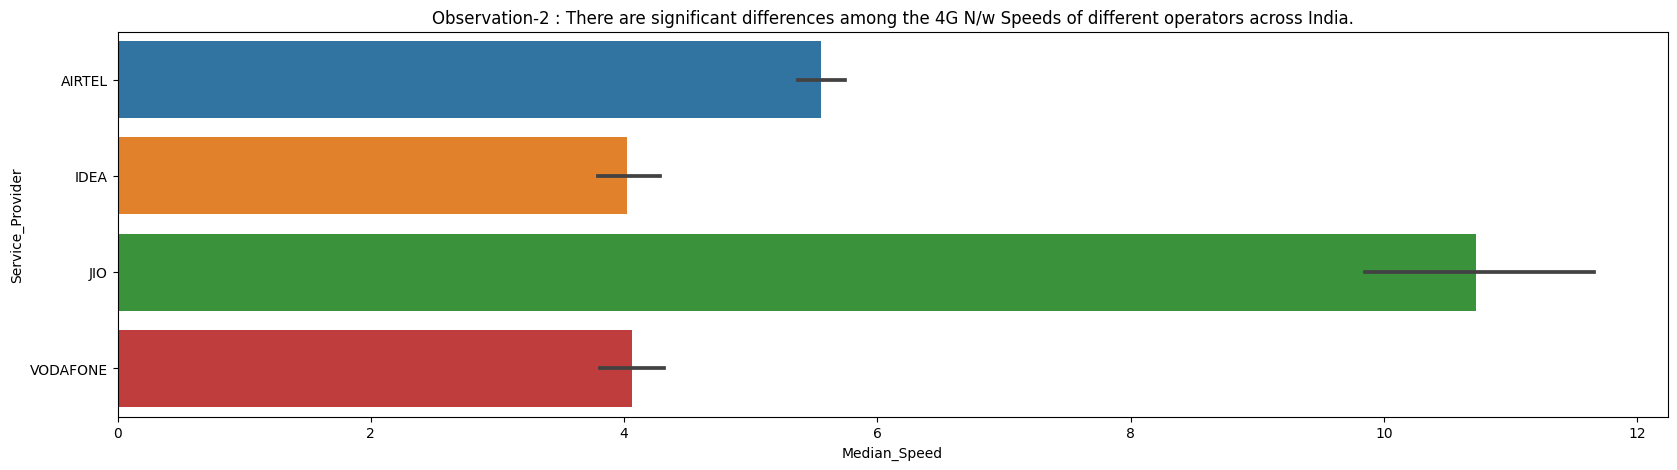

In [ ]:
# Plot for Observation-2 : There are significant differences among the 4G N/w Speeds of different operators across India.

plt.figure(figsize=(20,5))
plt.title('Observation-2 : There are significant differences among the 4G N/w Speeds of different operators across India.')
sns.barplot(data=tel_df[tel_df['Technology'] == '4G'], y = 'Service_Provider', x = 'Median_Speed', orient = 'horizontal' )
plt.show()

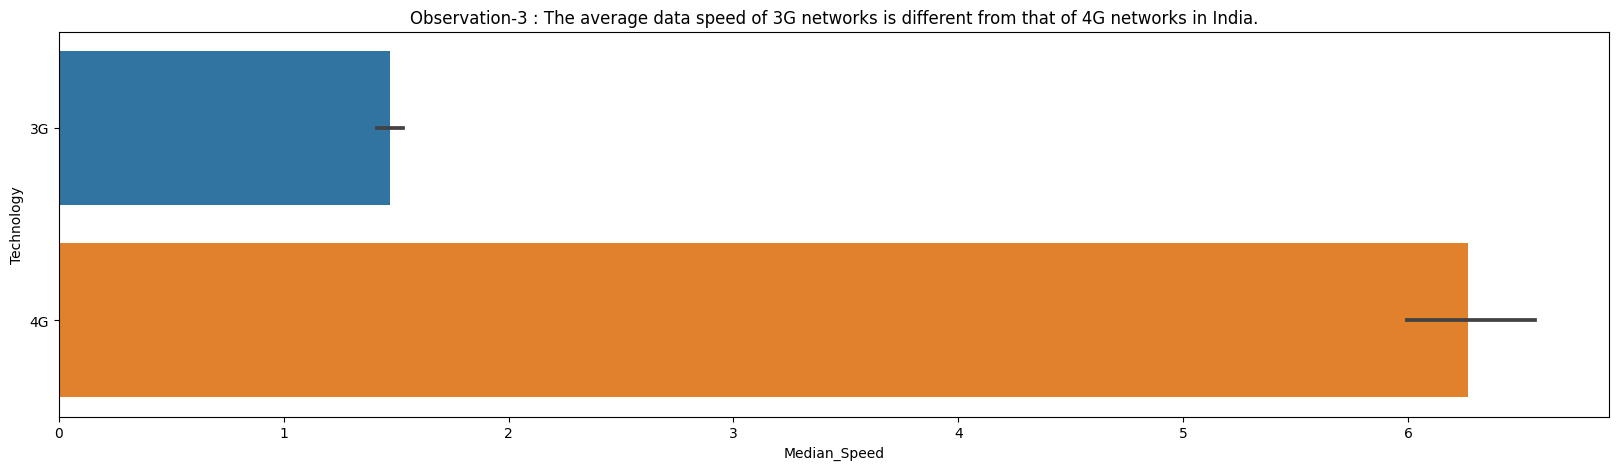

In [ ]:
# Plot for Observation-3 : The average data speed of 3G networks is different from that of 4G networks in India.

plt.figure(figsize=(20,5))
plt.title('Observation-3 : The average data speed of 3G networks is different from that of 4G networks in India.')
sns.barplot(data=tel_df, y = 'Technology', x = 'Median_Speed', orient = 'horizontal' )
plt.show()

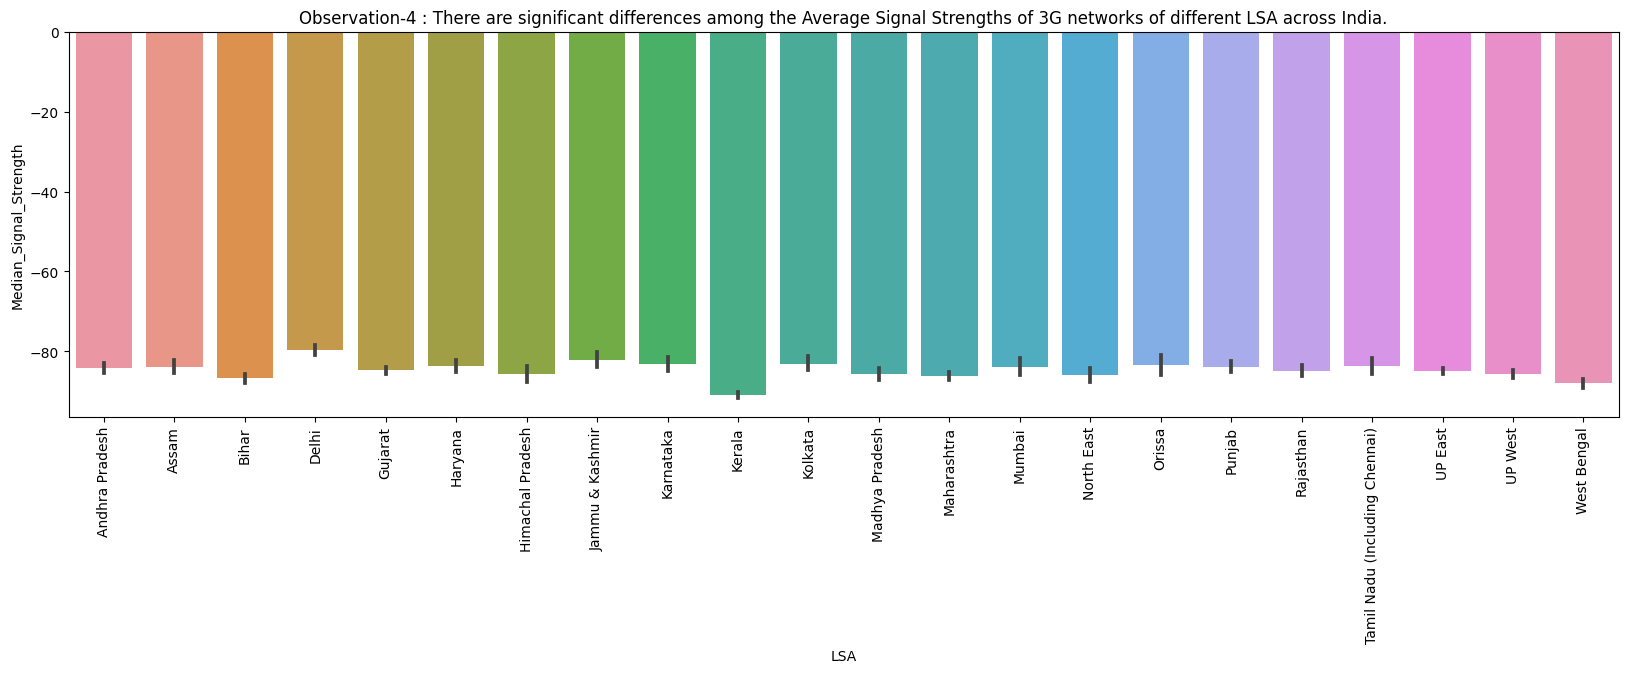

In [ ]:
# Plot for Observation-4 : There are significant differences among the Average Signal Strengths of 3G networks of different LSA across India.

plt.figure(figsize=(20,5))
plt.title('Observation-4 : There are significant differences among the Average Signal Strengths of 3G networks of different LSA across India.')
sns.barplot(data=tel_df[tel_df['Technology'] == '3G'], x = 'LSA', y = 'Median_Signal_Strength')
plt.xticks(rotation=90)
plt.show()

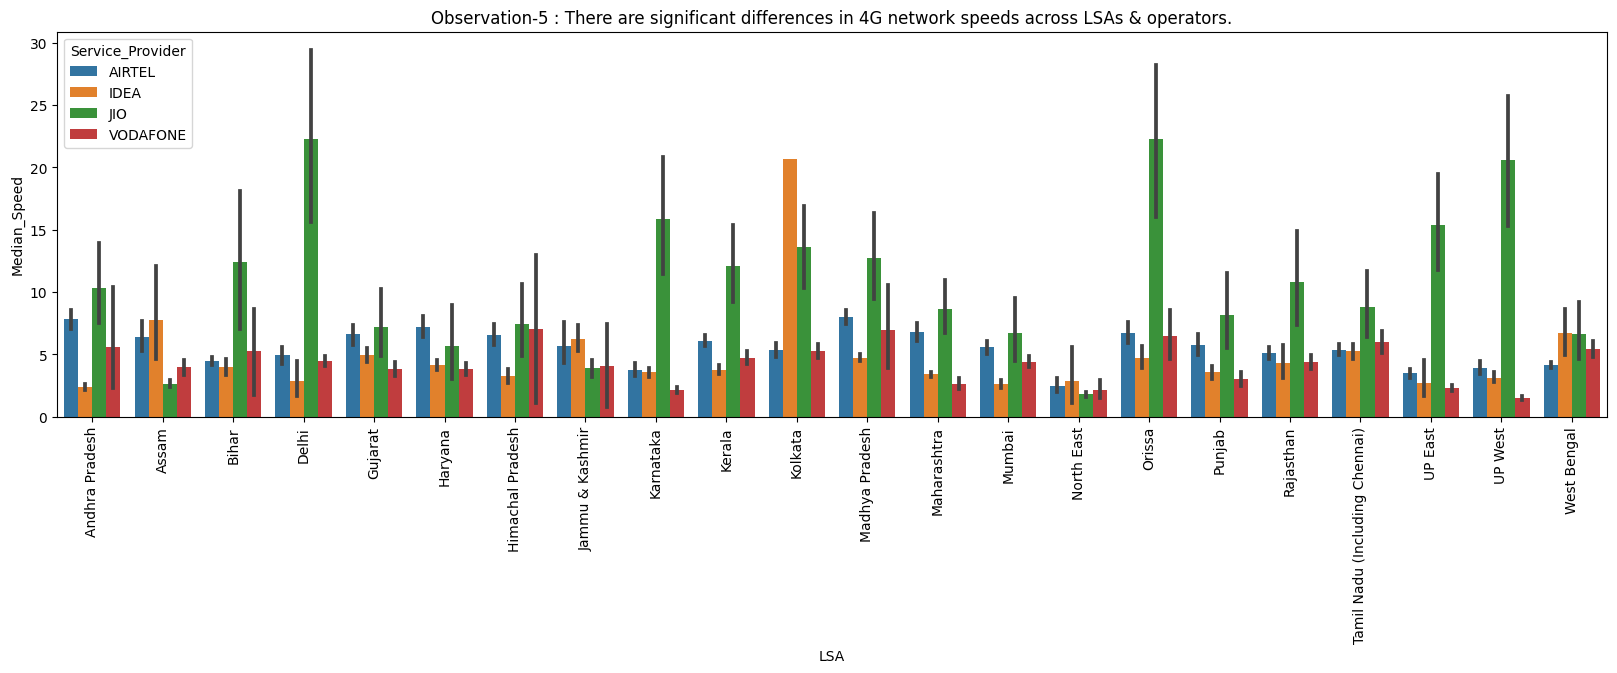

In [ ]:
# Plot for Observation-5 : There are significant differences in 4G network speeds across LSAs & operators.

plt.figure(figsize=(20,5))
plt.title('Observation-5 : There are significant differences in 4G network speeds across LSAs & operators.')
sns.barplot(data=tel_df[tel_df['Technology'] == '4G'], x = 'LSA', y = 'Median_Speed', hue = 'Service_Provider' )
plt.xticks(rotation=90)
plt.show()

# **8. Recommendation to the operators**

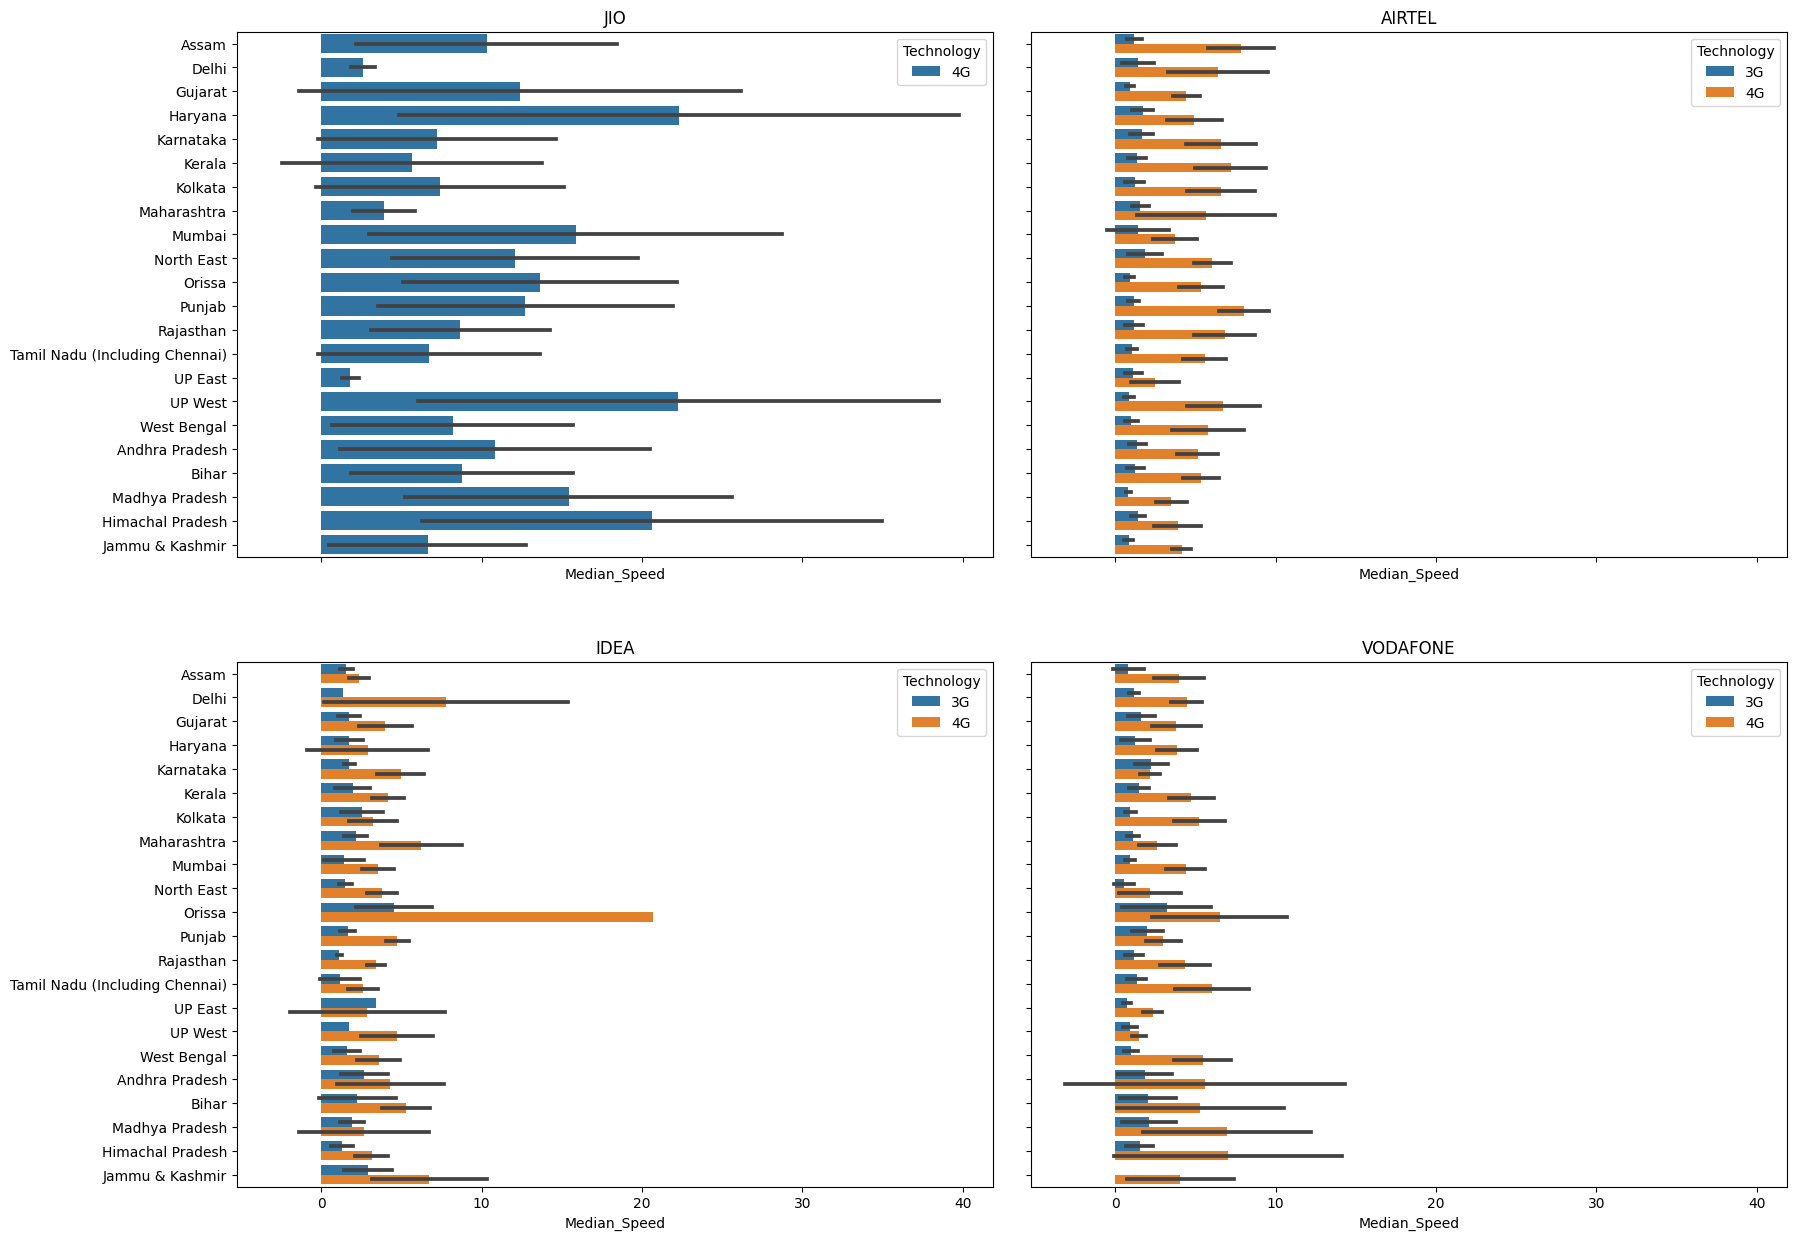

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(20, 15), sharex=True, sharey=True)

sns.barplot(data=tel_df[tel_df['Service_Provider'] == 'JIO'], y='LSA', x='Median_Speed', hue='Technology', ax=axes[0][0], orient='horizontal', errorbar = 'sd')
axes[0][0].set_title('JIO')
axes[0][0].set_ylabel(None)

sns.barplot(data=tel_df[tel_df['Service_Provider'] == 'AIRTEL'], y='LSA', x='Median_Speed', hue='Technology', ax=axes[0][1], orient='horizontal', errorbar = 'sd')
axes[0][1].set_title('AIRTEL')
axes[0][1].set_ylabel(None)

sns.barplot(data=tel_df[tel_df['Service_Provider'] == 'IDEA'], y='LSA', x='Median_Speed', hue='Technology', ax=axes[1][0], orient='horizontal', errorbar = 'sd')
axes[1][0].set_title('IDEA')
axes[1][0].set_ylabel(None)

sns.barplot(data=tel_df[tel_df['Service_Provider'] == 'VODAFONE'], y='LSA', x='Median_Speed', hue='Technology', ax=axes[1][1], orient='horizontal', errorbar = 'sd')
axes[1][1].set_title('VODAFONE')
axes[1][1].set_ylabel(None)

plt.subplots_adjust(wspace=0.05, hspace=0.2)
plt.show()


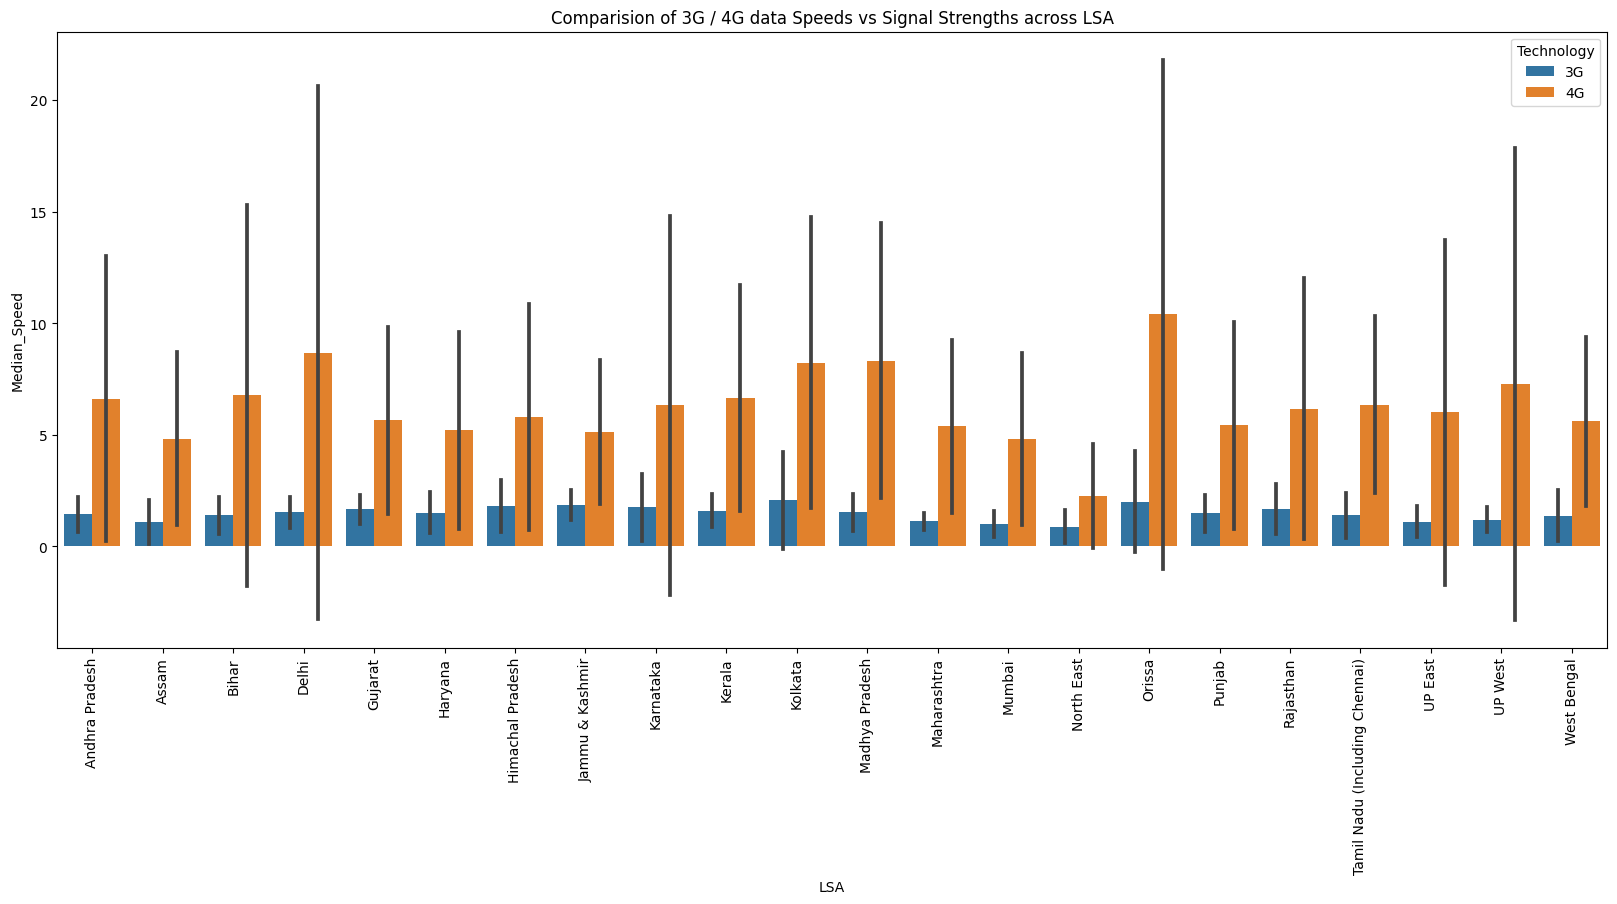

In [ ]:
plt.figure(figsize=(20, 8))

#Plotting barplots with error bars showing Standard Deviation values
sns.barplot(data=tel_df, x='LSA', y='Median_Speed', hue = 'Technology' , errorbar = 'sd')
plt.xticks(rotation=90)

plt.title('Comparision of 3G / 4G data Speeds vs Signal Strengths across LSA')

plt.show()



# **8.1 Recommendations to the Operators :**

1) Operators needs to keep a check on 3G/4G Speeds in same LSA, as the conditions will be same for all the operators.

2) 4G Speeds in Bihar, Delhi, Karnataka, Orissa and UP have high deviations, which need to be reduced.

3) JIO needs to deploy more resources in Delhi, Maharastra and UP-East to improve network quality.

4) AIRTEL needs to keep a check for resource deployment in MUMBAI & UP East.

5) IDEA needs to keep a check in Assam, Haryana, Kolkata and MP as in these LSAs 3G & 4G speeds are nearly same, and Statistics for UP-East shows IDEA-3G providing better speeds than IDEA-4G, which leads to customer dis-satisfaction.

6) VODAFONE also provides nearly similar 3G-4G network speeds in Karnataka, which may lead to customer dis-satisfaction and ultimately loss of customer.